In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

# ***⊹₊ ˚‧︵‿₊ 𝐏𝐀𝐑𝐓 𝟏 ₊‿︵‧ ˚ ₊⊹***

## ***𝟏.𝟏 𝐀𝐜𝐭𝐢𝐯𝐚𝐭𝐢𝐨𝐧 𝐅𝐮𝐧𝐜𝐭𝐢𝐨𝐧:***

In [ ]:
def ReLU(preactivation):
  activation = np.clip(preactivation, 0, None)
  return activation

In [ ]:
def ReLU_Derivative(preactivation):
  activation = np.clip(preactivation, 0, 1)
  return activation

In [ ]:
def Linear_Activation(x):
    return x

## ***𝟏.𝟐 𝐋𝐨𝐬𝐬 𝐅𝐮𝐧𝐜𝐭𝐢𝐨𝐧:***

In [ ]:
def sum_squared_error_loss(y_train, y_predict):
  b4_sqr = y_train - y_predict
  loss = np.sum(b4_sqr ** 2)
  return loss

In [ ]:
def sum_squared_error_derivative(y_train, y_predict):
  b4_sqr = y_train - y_predict
  loss = -2 * b4_sqr
  return loss

# ***⊹₊ ˚‧︵‿₊ 𝐏𝐀𝐑𝐓 𝟐 ₊‿︵‧ ˚ ₊⊹***

## ***𝟐.𝟏 𝐅𝐨𝐫𝐰𝐚𝐫𝐝 𝐏𝐫𝐨𝐩𝐚𝐠𝐚𝐭𝐢𝐨𝐧 𝐚𝐧𝐝 𝐁𝐚𝐜𝐤𝐰𝐚𝐫𝐝 𝐏𝐫𝐨𝐩𝐚𝐠𝐚𝐭𝐢𝐨𝐧 +*** ***𝟐.𝟐 𝐓𝐫𝐚𝐢𝐧𝐢𝐧𝐠 𝐋𝐨𝐨𝐩***

In [ ]:
class NeuralNetwork:
    def __init__(self, layers, n = 42):
        self.layers = layers
        self.weights, self.biases = self.init_params(self.layers, n)


    def init_params(self, layers, n):
        weights = []
        biases = []

        for i in range(len(layers) - 1):
          # WAY ONE:
          # weight = np.random.randn(layers[i], layers[i + 1]) * 0.01  # Small random values
          # bias = np.zeros((1, layers[i + 1]))  # Initialize biases to zero
          # weights.append(weight)
          # biases.append(bias)

          # WAY TWO:
          np.random.seed(n)
          limit = np.sqrt(2 / layers[i])
          weights.append(np.random.uniform(-limit, limit, (layers[i], layers[i + 1])))
          biases.append(np.zeros((1, layers[i + 1])))

        return weights, biases


    def forward_propagation(self, x):
        self.a = x
        self.z = []
        for i in range(len(self.weights)):
            z = np.dot(self.a, self.weights[i]) + self.biases[i]
            self.z.append(z)
            self.a = ReLU(z) if i < len(self.weights) - 1 else Linear_Activation(z)

        return self.a


    def backward_propagation(self, x, y, learning_rate):
        m = y.shape[0] #This line retrieves the number of training examples (samples)
        dA = sum_squared_error_derivative(y, self.a)
        activations = [x] + [ReLU(z) for z in self.z[:-1]]

        for i in reversed(range(len(self.weights))):
            dZ = dA * (ReLU_Derivative(self.z[i]) if i < len(self.weights) - 1 else 1)
            dW = np.dot(activations[i].T, dZ) / m
            db = np.sum(dZ, axis=0, keepdims=True) / m # gradient of the loss with respect to the pre-activation values in the current layer
            dA = np.dot(dZ, self.weights[i].T)

            self.weights[i] -= learning_rate * dW
            self.biases[i] -= learning_rate * db


    def train(self, input_data, output_data, num_epochs, learning_rate):
        losses = []
        for epoch in range(num_epochs):
            output = self.forward_propagation(input_data)
            loss = sum_squared_error_loss(output_data, output)
            losses.append(loss)
            self.backward_propagation(input_data, output_data, learning_rate)

            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss:.4f}, LR: {learning_rate}')

        return losses

### ***𝐡𝐞𝐥𝐩𝐟𝐮𝐥 𝐟𝐮𝐧𝐜𝐭𝐢𝐨𝐧𝐬:***

In [ ]:
def get_user_input_for_layers(input_size, output_size):
    layers_input = input("Enter the number of neurons in each layer (comma-separated, e.g., 1,2,3): ")
    hidden_layers = [int(x.strip()) for x in layers_input.split(',')]

    return [input_size] + hidden_layers + [output_size]

In [ ]:
def get_user_input_for_training():
    inp = input("Enter the number of learning rate and epoch (comma-separated, e.g., 1,2,3): ")
    lst = [float(x.strip()) for x in inp.split(',')]

    return lst[0], int(lst[1])

In [ ]:
def create_data(rows = 1000, colms = 3, rs = 42):
  np.random.seed(rs)

  # VARIABLE ROWS AND COLMS:
  # num_samples = rows
  # input_data = np.random.rand(num_samples, colms)
  # weights = np.arange(colms)
  # output_data = np.dot(input_data, weights) + colms
  # output_data = output_data.reshape(-1, 1)

  # FIXED ROWS AND COLMS:
  input_data = np.random.rand(rows, colms)

  if colms == 3:
    output_data = np.dot(input_data, np.array([2, -1, 1])) + colms
  else:
    weights = np.random.randint(-3,3, colms) #generates a random weight vector with integer values between -3 and 2 (inclusive)
    output_data = np.dot(input_data, weights) + colms

  output_data = output_data.reshape(-1, 1)

  return input_data, output_data

### ***𝐓𝐞𝐬𝐭𝐢𝐧𝐠 𝐂𝐨𝐝𝐞:***

In [ ]:
# Creating synthetic data:
input_data, output_data = create_data(1000, 3)

# Using the NN class:
layers = get_user_input_for_layers(input_data.shape[1], output_data.shape[1]) # input_data.shape[1] gives the number of input features (3 in this case), output_data.shape[1] (1 in this case).
nn = NeuralNetwork(layers, 21)
learning_rate, num_epochs = get_user_input_for_training()

# Training:
output = nn.train(input_data, output_data, num_epochs, learning_rate)

# Evaluating the model:
predicted_output = nn.forward_propagation(input_data)
loss = sum_squared_error_loss(output_data, predicted_output)
print(f'Final Loss on Training Data: {loss:.4f}')

Enter the number of neurons in each layer (comma-separated, e.g., 1,2,3): 6,12,24
Enter the number of learning rate and epoch (comma-separated, e.g., 1,2,3): 0.05,500
Epoch 0, Loss: 16503.9046, LR: 0.05
Epoch 100, Loss: 384.4904, LR: 0.05
Epoch 200, Loss: 278.1516, LR: 0.05
Epoch 300, Loss: 165.7130, LR: 0.05
Epoch 400, Loss: 32.0392, LR: 0.05
Final Loss on Training Data: 5.4141


## ***𝟐.𝟑 𝐄𝐱𝐩𝐞𝐫𝐢𝐦𝐞𝐧𝐭 𝐰𝐢𝐭𝐡 𝐇𝐲𝐩𝐞𝐫𝐩𝐚𝐫𝐚𝐦𝐞𝐭𝐞𝐫𝐬:***

**𝟏. 𝐋𝐚𝐲𝐞𝐫𝐬**

Enter the number of experiments: 3
Enter the number of neurons in each layer (comma-separated, e.g., 1,2,3): 6
Enter the number of learning rate and epoch (comma-separated, e.g., 1,2,3): 0.01,300
Training with layers: [3, 6, 1], learning rate: 0.01, epochs: 300
Epoch 0, Loss: 15180.2768, LR: 0.01
Epoch 100, Loss: 209.9730, LR: 0.01
Epoch 200, Loss: 94.7356, LR: 0.01
Enter the number of neurons in each layer (comma-separated, e.g., 1,2,3): 6,12
Enter the number of learning rate and epoch (comma-separated, e.g., 1,2,3): 0.01,300
Training with layers: [3, 6, 12, 1], learning rate: 0.01, epochs: 300
Epoch 0, Loss: 16137.7659, LR: 0.01
Epoch 100, Loss: 289.7016, LR: 0.01
Epoch 200, Loss: 175.1974, LR: 0.01
Enter the number of neurons in each layer (comma-separated, e.g., 1,2,3): 6,12,24
Enter the number of learning rate and epoch (comma-separated, e.g., 1,2,3): 0.01,300
Training with layers: [3, 6, 12, 24, 1], learning rate: 0.01, epochs: 300
Epoch 0, Loss: 16383.2944, LR: 0.01
Epoch 100, L

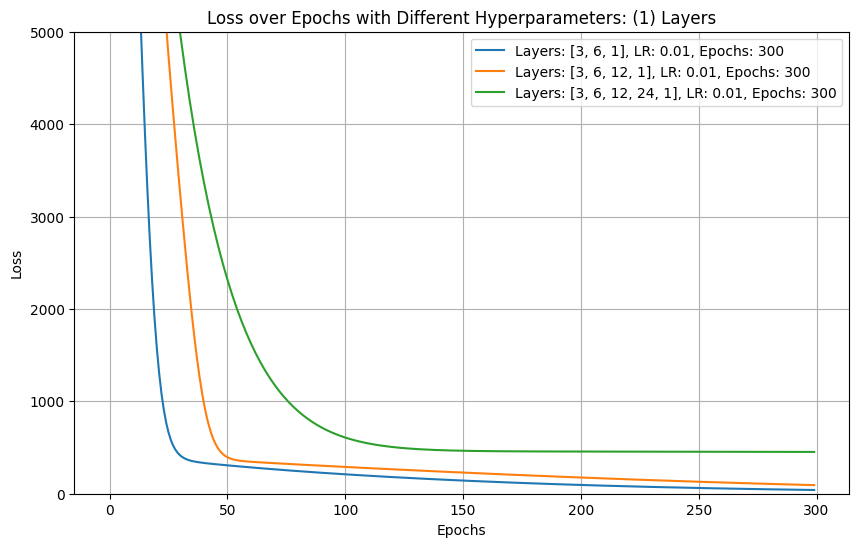

In [ ]:
import matplotlib.pyplot as plt

# Function to experiment with hyperparameters
def experiment_with_hyperparameters(rs):
    layers = get_user_input_for_layers(input_data.shape[1], output_data.shape[1])
    learning_rate, num_epochs = get_user_input_for_training()

    # Initialize and train the neural network
    nn = NeuralNetwork(layers, rs)
    print(f'Training with layers: {layers}, learning rate: {learning_rate}, epochs: {num_epochs}')
    losses = nn.train(input_data, output_data, num_epochs, learning_rate)
    plt.plot(losses, label=f'Layers: {layers}, LR: {learning_rate}, Epochs: {num_epochs}')

# Plotting results
plt.figure(figsize=(10, 6))

n = int(input("Enter the number of experiments: "))
for i in range(n):
    experiment_with_hyperparameters(25)

# Adding plot details
plt.title('Loss over Epochs with Different Hyperparameters: (1) Layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 5000)
plt.legend()
plt.grid()
plt.show()

**𝟐. 𝐍𝐞𝐮𝐫𝐨𝐧𝐬**

Enter the number of experiments: 3
Enter the number of neurons in each layer (comma-separated, e.g., 1,2,3): 6,9,12
Enter the number of learning rate and epoch (comma-separated, e.g., 1,2,3): 0.01,300
Training with layers: [3, 6, 9, 12, 1], learning rate: 0.01, epochs: 300
Epoch 0, Loss: 16580.3617, LR: 0.01
Epoch 100, Loss: 710.3182, LR: 0.01
Epoch 200, Loss: 495.0114, LR: 0.01
Enter the number of neurons in each layer (comma-separated, e.g., 1,2,3): 6,12,24
Enter the number of learning rate and epoch (comma-separated, e.g., 1,2,3): 0.01,300
Training with layers: [3, 6, 12, 24, 1], learning rate: 0.01, epochs: 300
Epoch 0, Loss: 16383.2944, LR: 0.01
Epoch 100, Loss: 607.9092, LR: 0.01
Epoch 200, Loss: 456.2987, LR: 0.01
Enter the number of neurons in each layer (comma-separated, e.g., 1,2,3): 9,27,81
Enter the number of learning rate and epoch (comma-separated, e.g., 1,2,3): 0.01,300
Training with layers: [3, 9, 27, 81, 1], learning rate: 0.01, epochs: 300
Epoch 0, Loss: 16055.1099, L

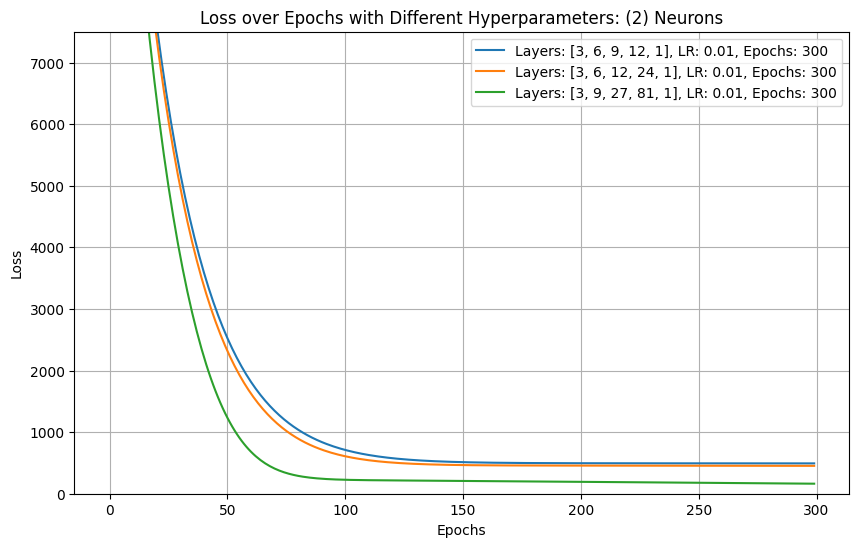

In [ ]:
import matplotlib.pyplot as plt

# Function to experiment with hyperparameters
def experiment_with_hyperparameters(rs):
    layers = get_user_input_for_layers(input_data.shape[1], output_data.shape[1])
    learning_rate, num_epochs = get_user_input_for_training()

    # Initialize and train the neural network
    nn = NeuralNetwork(layers, rs)
    print(f'Training with layers: {layers}, learning rate: {learning_rate}, epochs: {num_epochs}')
    losses = nn.train(input_data, output_data, num_epochs, learning_rate)
    plt.plot(losses, label=f'Layers: {layers}, LR: {learning_rate}, Epochs: {num_epochs}')

# Plotting results
plt.figure(figsize=(10, 6))

n = int(input("Enter the number of experiments: "))
for i in range(n):
    experiment_with_hyperparameters(25)

# Adding plot details
plt.title('Loss over Epochs with Different Hyperparameters: (2) Neurons')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 7500)
plt.legend()
plt.grid()
plt.show()

Enter the number of experiments: 5
Enter the number of neurons in each layer (comma-separated, e.g., 1,2,3): 3,3,3
Enter the number of learning rate and epoch (comma-separated, e.g., 1,2,3): 0.01,300
Training with layers: [3, 3, 3, 3, 1], learning rate: 0.01, epochs: 300
Epoch 0, Loss: 16297.8302, LR: 0.01
Epoch 100, Loss: 246.5630, LR: 0.01
Epoch 200, Loss: 124.8012, LR: 0.01
Enter the number of neurons in each layer (comma-separated, e.g., 1,2,3): 6,9,12
Enter the number of learning rate and epoch (comma-separated, e.g., 1,2,3): 0.01,300
Training with layers: [3, 6, 9, 12, 1], learning rate: 0.01, epochs: 300
Epoch 0, Loss: 16580.3617, LR: 0.01
Epoch 100, Loss: 710.3182, LR: 0.01
Epoch 200, Loss: 495.0114, LR: 0.01
Enter the number of neurons in each layer (comma-separated, e.g., 1,2,3): 6,12,24
Enter the number of learning rate and epoch (comma-separated, e.g., 1,2,3): 0.01,300
Training with layers: [3, 6, 12, 24, 1], learning rate: 0.01, epochs: 300
Epoch 0, Loss: 16383.2944, LR: 0

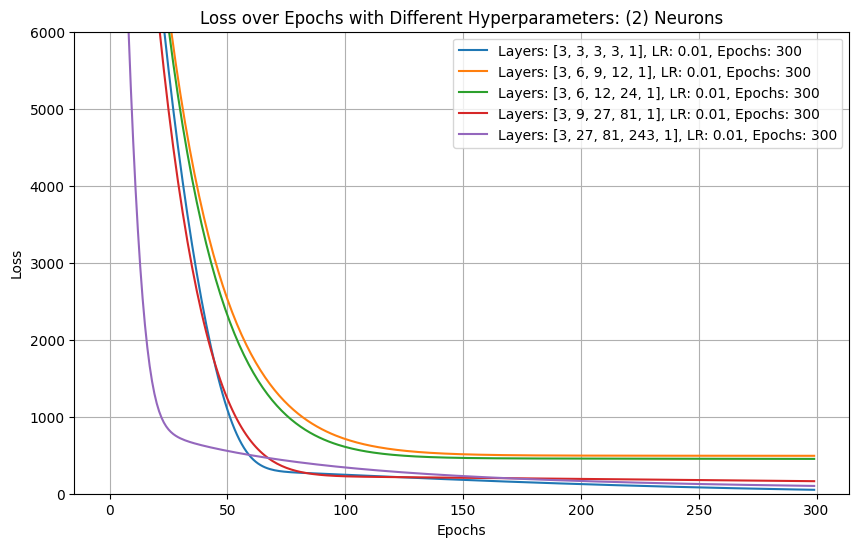

In [ ]:
import matplotlib.pyplot as plt

# Function to experiment with hyperparameters
def experiment_with_hyperparameters(rs):
    layers = get_user_input_for_layers(input_data.shape[1], output_data.shape[1])
    learning_rate, num_epochs = get_user_input_for_training()

    # Initialize and train the neural network
    nn = NeuralNetwork(layers, rs)
    print(f'Training with layers: {layers}, learning rate: {learning_rate}, epochs: {num_epochs}')
    losses = nn.train(input_data, output_data, num_epochs, learning_rate)
    plt.plot(losses, label=f'Layers: {layers}, LR: {learning_rate}, Epochs: {num_epochs}')

# Plotting results
plt.figure(figsize=(10, 6))

n = int(input("Enter the number of experiments: "))
for i in range(n):
    experiment_with_hyperparameters(25)

# Adding plot details
plt.title('Loss over Epochs with Different Hyperparameters: (2) Neurons')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 6000)
plt.legend()
plt.grid()
plt.show()

**𝟑. 𝐋𝐞𝐚𝐫𝐧𝐢𝐧𝐠 𝐑𝐚𝐭𝐞**

Enter the number of experiments: 4
Enter the number of neurons in each layer (comma-separated, e.g., 1,2,3): 6
Enter the number of learning rate and epoch (comma-separated, e.g., 1,2,3): 0.01,300
Training with layers: [3, 6, 1], learning rate: 0.01, epochs: 300
Epoch 0, Loss: 16288.0686, LR: 0.01
Epoch 100, Loss: 142.6510, LR: 0.01
Epoch 200, Loss: 63.5480, LR: 0.01
Enter the number of neurons in each layer (comma-separated, e.g., 1,2,3): 6
Enter the number of learning rate and epoch (comma-separated, e.g., 1,2,3): 0.05,300
Training with layers: [3, 6, 1], learning rate: 0.05, epochs: 300
Epoch 0, Loss: 16288.0686, LR: 0.05
Epoch 100, Loss: 5.2595, LR: 0.05
Epoch 200, Loss: 0.8542, LR: 0.05
Enter the number of neurons in each layer (comma-separated, e.g., 1,2,3): 6
Enter the number of learning rate and epoch (comma-separated, e.g., 1,2,3): 0.1,300
Training with layers: [3, 6, 1], learning rate: 0.1, epochs: 300
Epoch 0, Loss: 16288.0686, LR: 0.1
Epoch 100, Loss: 0.8642, LR: 0.1
Epoch 2

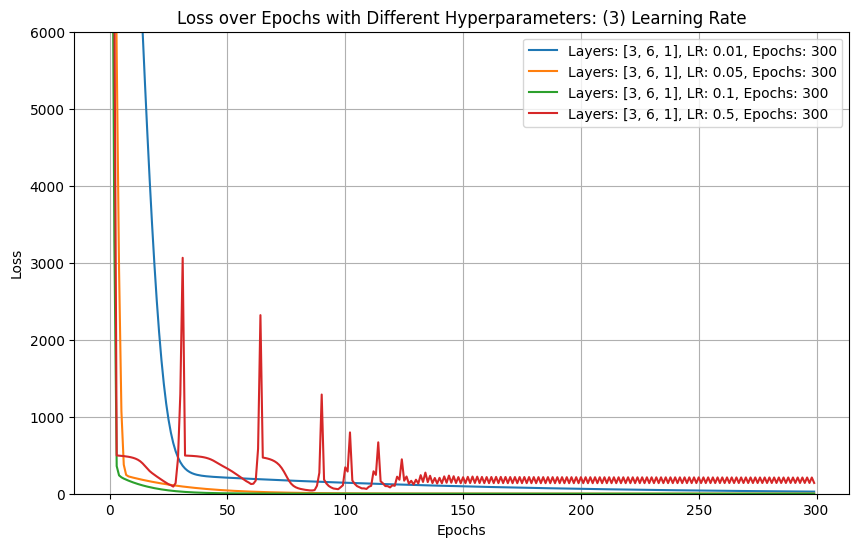

In [ ]:
import matplotlib.pyplot as plt

# Function to experiment with hyperparameters
def experiment_with_hyperparameters(rs):
    layers = get_user_input_for_layers(input_data.shape[1], output_data.shape[1])
    learning_rate, num_epochs = get_user_input_for_training()

    # Initialize and train the neural network
    nn = NeuralNetwork(layers, rs)
    print(f'Training with layers: {layers}, learning rate: {learning_rate}, epochs: {num_epochs}')
    losses = nn.train(input_data, output_data, num_epochs, learning_rate)
    plt.plot(losses, label=f'Layers: {layers}, LR: {learning_rate}, Epochs: {num_epochs}')

# Plotting results
plt.figure(figsize=(10, 6))

n = int(input("Enter the number of experiments: "))
for i in range(n):
    experiment_with_hyperparameters(66)

# Adding plot details
plt.title('Loss over Epochs with Different Hyperparameters: (3) Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 6000)
plt.legend()
plt.grid()
plt.show()

**𝟒. 𝐄𝐩𝐨𝐜𝐡𝐬**

Enter the number of experiments (up to 4 for 2x2 grid): 4
Enter the number of neurons in each layer (comma-separated, e.g., 1,2,3): 6
Enter the number of learning rate and epoch (comma-separated, e.g., 1,2,3): 0.01,100
Training with layers: [3, 6, 1], learning rate: 0.01, epochs: 100
Epoch 0, Loss: 15970.4209, LR: 0.01
Enter the number of neurons in each layer (comma-separated, e.g., 1,2,3): 6
Enter the number of learning rate and epoch (comma-separated, e.g., 1,2,3): 0.01,300
Training with layers: [3, 6, 1], learning rate: 0.01, epochs: 300
Epoch 0, Loss: 15970.4209, LR: 0.01
Epoch 100, Loss: 385.7398, LR: 0.01
Epoch 200, Loss: 202.9163, LR: 0.01
Enter the number of neurons in each layer (comma-separated, e.g., 1,2,3): 6
Enter the number of learning rate and epoch (comma-separated, e.g., 1,2,3): 0.01,500
Training with layers: [3, 6, 1], learning rate: 0.01, epochs: 500
Epoch 0, Loss: 15970.4209, LR: 0.01
Epoch 100, Loss: 385.7398, LR: 0.01
Epoch 200, Loss: 202.9163, LR: 0.01
Epoch 300

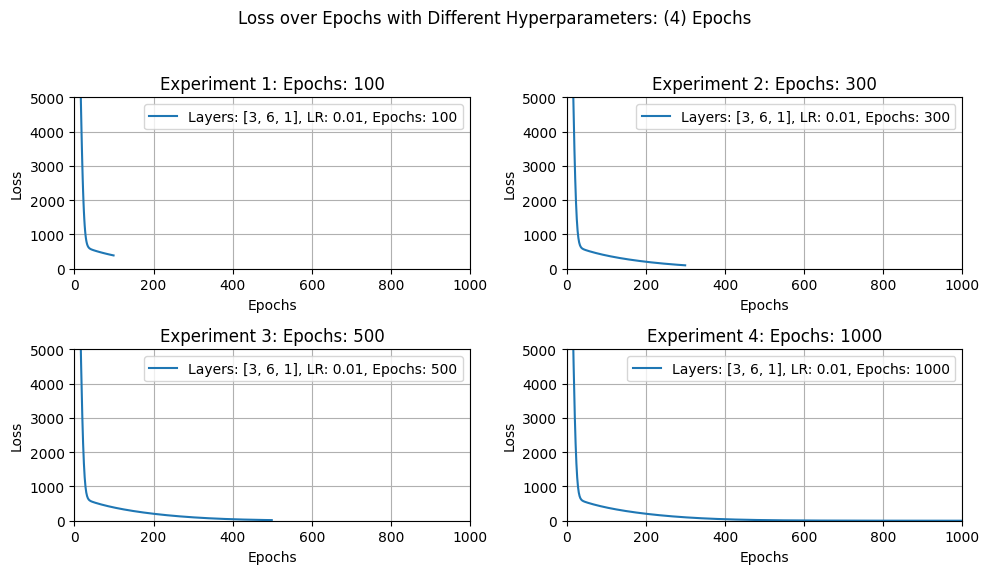

In [ ]:
import matplotlib.pyplot as plt

# Function to experiment with hyperparameters
def experiment_with_hyperparameters(epoch_index, rs):
    layers = get_user_input_for_layers(input_data.shape[1], output_data.shape[1])
    learning_rate, num_epochs = get_user_input_for_training()

    # Initialize and train the neural network
    nn = NeuralNetwork(layers, rs)
    print(f'Training with layers: {layers}, learning rate: {learning_rate}, epochs: {num_epochs}')
    losses = nn.train(input_data, output_data, num_epochs, learning_rate)

    # Plot each experiment's loss in a separate subplot
    plt.subplot(2, 2, epoch_index + 1)
    plt.plot(losses, label=f'Layers: {layers}, LR: {learning_rate}, Epochs: {num_epochs}')
    plt.title(f'Experiment {epoch_index + 1}: Epochs: {num_epochs}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 5000)
    plt.xlim(0, 1000)
    plt.legend()
    plt.grid()

# Set up the figure and specify a 2x2 grid
plt.figure(figsize=(10, 6))

n = int(input("Enter the number of experiments (up to 4 for 2x2 grid): "))
for i in range(n):
    experiment_with_hyperparameters(i, 41)

# Add a main title, adjust layout, and show the plot
plt.suptitle('Loss over Epochs with Different Hyperparameters: (4) Epochs')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusts layout to prevent overlap with the main title
plt.show()


## **𝐑𝐞𝐩𝐨𝐫𝐭 𝐨𝐧 𝐭𝐡𝐞 𝐈𝐦𝐩𝐚𝐜𝐭 𝐨𝐟 𝐇𝐲𝐩𝐞𝐫𝐩𝐚𝐫𝐚𝐦𝐞𝐭𝐞𝐫𝐬 𝐨𝐧 𝐌𝐨𝐝𝐞𝐥 𝐏𝐞𝐫𝐟𝐨𝐫𝐦𝐚𝐧𝐜𝐞:**
During experimentation with various hyperparameters, we observed that choices regarding: **1. Layers, 2. Neurons, 3. Learning Rate,** and **4. Epochs**
had a direct impact on the model's accuracy and ability to predict target values effectively.

### **Layers:**
*   More layers allow the model to capture complex hierarchical patterns in the data.
*   Too many layers can lead to overfitting and increased computational cost, especially with limited data.

### **Neurons per Layer:**
*   More neurons within a layer increase the network's capacity to learn detailed features.
*   Too many neurons can also lead to overfitting, as the model may become too specific to the training data.

### **Learning Rate:**
*   Controls the speed of convergence to an optimal solution.
*   High learning rates can cause erratic updates (overshooting), while low rates may lead to slow training or local minima.

### **Epochs:**
*   Determines how many times the model passes over the training data.
*   Excessive epochs may lead to overfitting, and insufficient epochs can result in underfitting


## ***𝟐.𝟒 𝐓𝐞𝐬𝐭 𝐘𝐨𝐮𝐫 𝐌𝐨𝐝𝐞𝐥:***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Evaluation Function:
def evaluate_model(nn, input_data, output_data):
    predicted_output = nn.forward_propagation(input_data)
    mse = mean_squared_error(output_data, predicted_output)
    r2 = r2_score(output_data, predicted_output)
    print(f"Final MSE: {mse:.4f}")
    print(f"Final R²: {r2:.4f}")

In [ ]:
# Synthetic Data:
X, y = create_data(1200, 3, 21)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Using the NN class:
layers = get_user_input_for_layers(X_train.shape[1], y_train.shape[1]) # between () is int
NN_model = NeuralNetwork(layers, 21) # 21 rs for weight of neural network
learning_rate, num_epochs = get_user_input_for_training()
0.
# Training:
output = NN_model.train(X_train, y_train, num_epochs, learning_rate)

# Evaluating the model:
predicted_output = NN_model.forward_propagation(X_test)
loss = sum_squared_error_loss(y_test, predicted_output)
print(f'Final Loss on Training Data: {loss:.4f}')
print("---------")
print("Model Evaluation:")
evaluate_model(NN_model, X_test, y_test)

Enter the number of neurons in each layer (comma-separated, e.g., 1,2,3): 6
Enter the number of learning rate and epoch (comma-separated, e.g., 1,2,3): 0.05,500
Epoch 0, Loss: 17160.4911, LR: 0.05
Epoch 100, Loss: 49.8190, LR: 0.05
Epoch 200, Loss: 4.6878, LR: 0.05
Epoch 300, Loss: 1.9485, LR: 0.05
Epoch 400, Loss: 1.5051, LR: 0.05
Final Loss on Training Data: 0.3528
---------
Model Evaluation:
Final MSE: 0.0015
Final R²: 0.9969


## **𝐐𝐮𝐞𝐬𝐭𝐢𝐨𝐧: 𝐀𝐝𝐯𝐚𝐧𝐭𝐚𝐠𝐞𝐬 𝐚𝐧𝐝 𝐃𝐢𝐬𝐚𝐝𝐯𝐚𝐧𝐭𝐚𝐠𝐞𝐬 𝐨𝐟 𝐑𝐞𝐋𝐔 𝐀𝐜𝐭𝐢𝐯𝐚𝐭𝐢𝐨𝐧:**

#### **𝐀𝐝𝐯𝐚𝐧𝐭𝐚𝐠𝐞𝐬:**

*   ReLU is simple and efficient, helping the network learn complex patterns in the data faster.

*   It activates only positive inputs, which reduces computation and speeds up training.


---

#### **𝐃𝐢𝐬𝐚𝐝𝐯𝐚𝐧𝐭𝐚𝐠𝐞𝐬:**


*   ReLU can stop some neurons from learning, a problem called the "dying ReLU", where neurons always output zero. (when they're just negative)
*   It also doesn't control large outputs, which can lead to extreme predictions in regression tasks. (when we don't have a restriction or "bound/range" on the output)

